In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import re

In [61]:
import os
os.chdir('/data/ephemeral/project/level2-klue-nlp-06')

In [62]:
train_data = pd.read_csv('./dataset/train.csv')
test_data = pd.read_csv('./dataset/test_data.csv')

Data 설명

In [64]:
label_count = train_data['label'].value_counts().sort_index()
txt_file_path = './data_analysis/data_description.txt'

# 파일 읽기
with open(txt_file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# 데이터 구성
data_description = {'Relation_Class': [], 'Description': [], 'Count': []}

for line in lines:
    line = line.strip()
    if line:
        relation_class, description = map(str.strip, line.split('\t'))
        data_description['Relation_Class'].append(relation_class)
        data_description['Description'].append(description)
        data_description['Count'].append(label_count[relation_class])

# DataFrame 생성
data_description = pd.DataFrame(data_description)
data_description.head(5)

,Relation_Class,Description,Count
0,no_relation,"No relation in between (esubj, eobj)",9534
1,org:dissolved,The date when the specified organization was d...,66
2,org:founded,The date when the specified organization was f...,450
3,org:place_of_headquarters,The place which the headquarters of the specif...,1195
4,org:alternate_names,Alternative names called instead of the offici...,1320


Label의 특성을 파악하기 쉽게, 다음의 형태로 출력
                         
    Label (개수) : 설명
    {subject_entity : word_entity} 

- Example
    org:member_of (1866)  :  Organizations to which the specified organization belongs
    {'광주FC': '한국프로축구연맹', '제2총군': '일본 제국 육군', '맨체스터 시티 FC': '프리미어리그', '세비야': '스페인', '대원방송': '대원미디어'}

In [4]:
label_list = train_data['label'].unique()

for label in label_list:
    print(label + ' (' + str(data_description[data_description['Relation_Class']==label]['Count'].iloc[0]) + ') ' + ' :  ' + data_description[data_description['Relation_Class']==label]['Description'].iloc[0])
    
    df = train_data[train_data['label'] == label].head()
    
    output = {}
    for subject_entity, object_entity in zip(df['subject_entity'], df['object_entity']):
        result = re.search(r"'word':\s*'([^']*)'", subject_entity)
        subject_word = result.group(1)
        
        result = re.search(r"'word':\s*'([^']*)'", object_entity)
        object_word = result.group(1)
        
        output[subject_word] = object_word
    print(output)
    print()


no_relation (9534)  :  No relation in between (esubj, eobj)
{'비틀즈': '조지 해리슨', '민주평화당': '대안신당', '요미우리 자이언츠': '1967', 'AC 밀란': '1989', '미켈란젤로': '르네상스'}

org:member_of (1866)  :  Organizations to which the specified organization belongs
{'광주FC': '한국프로축구연맹', '제2총군': '일본 제국 육군', '맨체스터 시티 FC': '프리미어리그', '세비야': '스페인', '대원방송': '대원미디어'}

org:top_members/employees (4284)  :  The representative(s) or members of the specified organization
{'아성다이소': '박정부', '필라델피아 필리스': '박찬호', '곡성군': '유근기', 'HB엔터테인먼트': '문보미', '공무원연금공단': '정남준'}

org:alternate_names (1320)  :  Alternative names called instead of the official name to refer to the specified organization
{'북대서양 조약 기구': 'NATO', '유럽 축구 연맹': 'UEFA', '미국의 소리': 'Voice of America', 'Facebook': '페이스북', 'LG전자': '금성사'}

per:date_of_birth (1130)  :  The date when the specified person was born
{'박용오': '1937년 4월 29일', '제임스 클라크 로스': '1800년 ~ 1862년', '김동성': '1980년 2월 9일', '한상길': '1987년 9월 5일', '안효섭': '1995년 4월 17일'}

org:place_of_headquarters (1195)  :  The place whic

In [9]:
def show_particular_label(label, start, end):
    print(label + ' (' + str(data_description[data_description['Relation_Class']==label]['Count'].iloc[0]) + ') ' + ' :  ' + data_description[data_description['Relation_Class']==label]['Description'].iloc[0])
    print()
    df = train_data[train_data['label'] == label].iloc[start:end+1,:]
        
    for i, (subject_entity, object_entity) in enumerate(zip(df['subject_entity'], df['object_entity'])):
        result = re.search(r"'word':\s*'([^']*)'", subject_entity)
        subject_word = result.group(1)
        
        result = re.search(r"'word':\s*'([^']*)'", object_entity)
        object_word = result.group(1)
        
        print('['+str(start+i)+']'+'{' + '{} : {}'.format(subject_word, object_word) + '}')
        print(df.iloc[i]['sentence'])
        print()
    

show_particular_label('no_relation',2,6)

no_relation (9534)  :  No relation in between (esubj, eobj)

[2]{요미우리 자이언츠 : 1967}
1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8번으로 배정되었다.

[3]{AC 밀란 : 1989}
그에 따라 나폴리와 계약을 연장한 마라도나는 1989년 팀을 UEFA컵 정상으로 인도했으며 이듬해에는 유럽 챔피언 AC 밀란을 상대로 승리를 거두고 다시 한 번 세리에A에서 정상에 등극했다.

[4]{미켈란젤로 : 르네상스}
조토 디 본도네, 마사초, 피에로 델라 프란체스카, 도메니코 기를란다요, 페루지노, 미켈란젤로, 라파엘로, 보티첼리, 레오나르도 다빈치, 티치아노 등으로 대표되는 이탈리아 르네상스 회화는 당대와 그 이후의 시기 유럽 전체에 영향을 주었다.

[5]{이정미 : 정의당}
이정미 대표도 이날 기자회견에 앞서 한 라디오 방송에 출연 "정개특위를 한국당에 내주는 건 어떤 일이 있어도 안 된다"며 "지금 한국당을 어르고 구슬리는 게 민주당에 득이 된다고 생각할지 모르겠지만 정부 여당의 개혁 정책에 가장 힘을 실어줬던 정의당과 야3당의 개혁 공조가 어그러지는 상황이 될 것"이라고 지적했다.

[6]{한국수자원공사 : 환경부}
이번 포럼은 제주개발공사와 유네스코 아시아-태평양 본부, 한국지질자원연구원이 공동 주최하고 유네스코 파리본부, 제주특자치도, 환경부, 한국수자원공사, 한국건설기술연구원 등이 후원한다.



In [31]:
# 출력 옵션 변경: 최대 행 및 열 표시 설정
pd.set_option("display.max_rows", None)  # 모든 행을 표시하려면 None을 사용할 수 있습니다.
pd.set_option("display.max_columns", None)  # 모든 열을 표시하려면 None을 사용할 수 있습니다.
pd.set_option("display.max_colwidth", None)

print(train_data.head())

pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")
pd.reset_option("display.max_colwidth")

   id  \
0   0   
1   1   
2   2   
3   3   
4   4   

                                                                                              sentence  \
0                                          〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey Road》에 담은 노래다.   
1                                               호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으로 재탄생한다.   
2  K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터 관중 유치 성과와 마케팅 성과를 인정받아 ‘풀 스타디움상’과 ‘플러스 스타디움상’을 수상했다.   
3                       균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪고 있는 대구광역시에 행복박스를 전달했다고 10일 밝혔다.   
4                                             1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8번으로 배정되었다.   

                                                         subject_entity  \
0        {'word': '비틀즈', 'start_idx': 24, 'end_idx': 26, 'type': 'ORG'}   
1      {'word': '민주평화당', 'start_idx': 19, 'end_idx': 23, 'type': 'ORG'}   
2       {'word': '광주FC', 'start_idx': 21, 'end_idx': 24, 'type': 'ORG'}   
3      {

In [74]:
train_data['subject_entity'].head()

0          {'word': '비틀즈', 'start_idx': 24, 'end_idx': 26, 'type': 'ORG'}
1        {'word': '민주평화당', 'start_idx': 19, 'end_idx': 23, 'type': 'ORG'}
2         {'word': '광주FC', 'start_idx': 21, 'end_idx': 24, 'type': 'ORG'}
3        {'word': '아성다이소', 'start_idx': 13, 'end_idx': 17, 'type': 'ORG'}
4    {'word': '요미우리 자이언츠', 'start_idx': 22, 'end_idx': 30, 'type': 'ORG'}
Name: subject_entity, dtype: object

In [32]:
print(train_data.columns)

Index(['id', 'sentence', 'subject_entity', 'object_entity', 'label', 'source'], dtype='object')


In [43]:
print(len(train_data['label'].value_counts().sort_index()))
print((train_data['label'].value_counts().sort_index()))

30
no_relation                            9534
org:alternate_names                    1320
org:dissolved                            66
org:founded                             450
org:founded_by                          155
org:member_of                          1866
org:members                             420
org:number_of_employees/members          48
org:place_of_headquarters              1195
org:political/religious_affiliation      98
org:product                             380
org:top_members/employees              4284
per:alternate_names                    1001
per:children                            304
per:colleagues                          534
per:date_of_birth                      1130
per:date_of_death                       418
per:employee_of                        3573
per:origin                             1234
per:other_family                        190
per:parents                             520
per:place_of_birth                      166
per:place_of_death           

전체 라벨의 분포

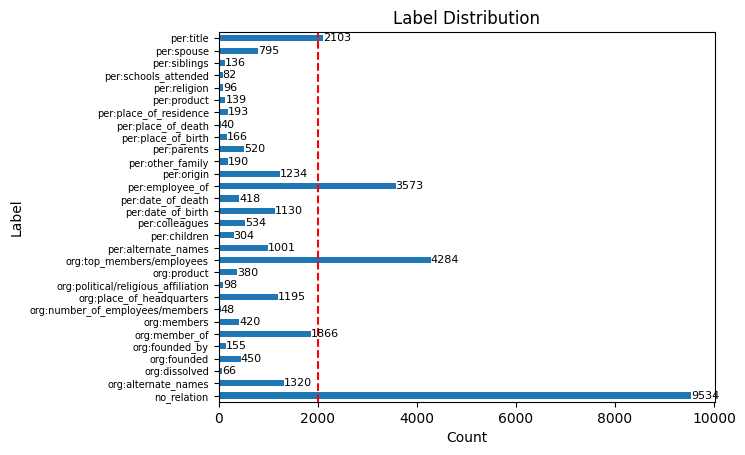

In [28]:
train_data['label'].value_counts().sort_index().plot(kind='barh')

# Annotate bar values with adjusted fontsize
for i, value in enumerate(train_data['label'].value_counts().sort_index()):
    plt.text(value + 0.1, i, str(value), ha='left', va='center', fontsize=8)


plt.axvline(x=2000, color='red', linestyle='--')

plt.title('Label Distribution')
plt.xlabel('Count')
plt.ylabel('Label')

plt.xticks(fontsize=10)
plt.yticks(fontsize=7)

plt.show()

2000개 이상인 label을 제외한 label 분포

In [12]:
label_counts = train_data['label'].value_counts().sort_index()

# 값이 2000 이상인 label 목록 추출
labels_over_2000 = label_counts[label_counts >= 2000].index.tolist()

print("값이 2000 이상인 label 목록:", labels_over_2000)

값이 2000 이상인 label 목록: ['no_relation', 'org:top_members/employees', 'per:employee_of', 'per:title']


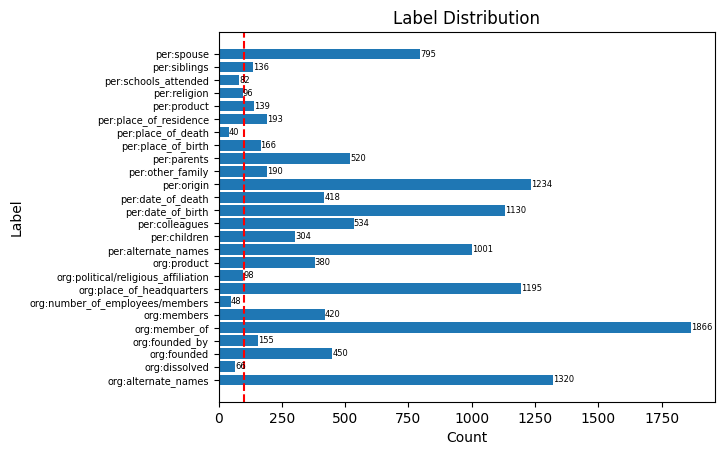

In [24]:
labels_to_exclude = labels_over_2000

plt.barh(train_data[~train_data['label'].isin(labels_to_exclude)]['label'].value_counts().sort_index().index,
         train_data[~train_data['label'].isin(labels_to_exclude)]['label'].value_counts().sort_index().values,
         height=0.8)

for i, value in enumerate(train_data[~train_data['label'].isin(labels_to_exclude)]['label'].value_counts().sort_index()):
    plt.text(value + 0.1, i, str(value), ha='left', va='center', fontsize=6)

plt.axvline(x=100, color='red', linestyle='--')

plt.title('Label Distribution')
plt.xlabel('Count')
plt.ylabel('Label')

plt.xticks(fontsize=10)
plt.yticks(fontsize=7)

plt.show()

100개 이하인 label

In [5]:
label_counts = train_data['label'].value_counts().sort_index()

labels_under_100 = label_counts[label_counts <= 100].index.tolist()

print("값이 100 이하인 label 목록:", labels_under_100)

값이 100 이하인 label 목록: ['org:dissolved', 'org:number_of_employees/members', 'org:political/religious_affiliation', 'per:place_of_death', 'per:religion', 'per:schools_attended']


In [7]:
# 출력 옵션 변경: 최대 행 및 열 표시 설정
pd.set_option("display.max_rows", None)  # 모든 행을 표시하려면 None을 사용할 수 있습니다.
pd.set_option("display.max_columns", None)  # 모든 열을 표시하려면 None을 사용할 수 있습니다.
pd.set_option("display.max_colwidth", None)
for label in labels_under_100:
    print(label + ' (' + str(data_description[data_description['Relation_Class']==label]['Count'].iloc[0]) + ') ' + ' :  ' + data_description[data_description['Relation_Class']==label]['Description'].iloc[0])
    
    df = train_data[train_data['label'] == label].head()
    
    output = {}
    for subject_entity, object_entity in zip(df['subject_entity'], df['object_entity']):
        result = re.search(r"'word':\s*'([^']*)'", subject_entity)
        subject_word = result.group(1)
        
        result = re.search(r"'word':\s*'([^']*)'", object_entity)
        object_word = result.group(1)
        
        output[subject_word] = object_word
    print(output)
    print()
    
    

pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")
pd.reset_option("display.max_colwidth")

org:dissolved (66)  :  The date when the specified organization was dissolved
{'대성여자중학교': '1959년', '제주교육대학교': '2008년 3월 1일', '진나라': '기원전 206년', '충남 일화 천마': '2012년', '로마제국': '395년'}

org:number_of_employees/members (48)  :  The total number of members that are affiliated in the specified organization
{'독일 연방군': '49만 5,000명', '군사고문단': '500명', '순천시': '281534명', '소녀시대': '9명', '광주 서구': '18개'}

org:political/religious_affiliation (98)  :  Political/religious groups which the specified organization is affiliated in
{'몽골 인민 공화국': '공산주의', '교황령': '가톨릭', '폴란드 인민 공화국': '공산주의', '노바야 가제타': '자유주의'}

per:place_of_death (40)  :  the place where the specified person died
{'최진영': '서울특별시 강남구', '막시밀리아노 1세': '멕시코 케레타로', '우범선': '일본 히로시마현 구레', '마리 드 메디시스': '쾰른', '김립': '상하이'}

per:religion (96)  :  The religion in which the specified person believes
{'라인홀트 니부어': '개신교', '사무드라굽타': '힌두교', '손병희': '천도교', '구카이': '진언종', '전덕기': '감리교'}

per:schools_attended (82)  :  A school where the specified person attended
{'문성민': 

In [10]:
for label in labels_under_100:
    show_particular_label(label,0,5)

org:dissolved (66)  :  The date when the specified organization was dissolved

[0]{대성여자중학교 : 1959년}
1959년 한국 전쟁으로 폐교된 대성여자중학교를 부활시키고 1960년에는 대성여자고등학교를 세웠다.

[1]{제주교육대학교 : 2008년 3월 1일}
2008년 3월 1일 제주교육대학교가 제주대학교에 통폐합, 제주대학교 교육대학으로 개편되 제주대학교 사라캠퍼스로 운영되고있다.

[2]{진나라 : 기원전 206년}
전영은 초나라를 돕지 않고 진나라를 멸하는 데에도 함께하지 않았으므로, 기원전 206년에 진나라가 망하고 항우가 실시한 제후 봉건에서 전시는 제나라 왕에서 밀려나 교동나라 왕으로 봉해졌다.

[3]{충남 일화 천마 : 2012년}
또한 2012년 해체된 충남 일화 천마에서 강유미를 드래프트로 뽑아 전력을 강화했다.

[4]{로마제국 : 395년}
50여년간의 사두 정치 체계이후, 330년 콘스탄티누스 1세 황제때 현 이스탄불 위치에 있는 비잔티움을 콘스탄티노폴리스로 명명하고 천도하였고, 395년에 로마제국은 테오도시우스 1세 황제 사후 동로마제국과 서로마제국으로 갈라지게 된다.

[5]{이스트로 : 2010년 10월}
2010년 10월 12일에 이스트로 해체가 공식 발표되었고, 13일 전 이스트로 선수단 공개 드래프트를 통해 위메이드 폭스에 영입되었다.

org:number_of_employees/members (48)  :  The total number of members that are affiliated in the specified organization

[0]{독일 연방군 : 49만 5,000명}
냉전 동안 독일 연방군은 NATO의 서유럽 방위의 주력군이 되었으며 전군을 통틀어 49만 5,000명의 병력과 17만명의 군무원을 거느리고 있었다.

[1]{군사고문단 : 500명}
결국, 대한민국 정부의 반대에도 불구하고 주한미군은 약 500명의 군사고문단만 남기고 마

In [4]:
# 문자열로 표현된 파이썬 코드
expression = "[1, 2, 3, 4, 5], [1,2,3]"

# eval 함수를 사용하여 문자열을 파이썬 코드로 실행
result = eval(expression)

# 결과 출력
print(type(result))


<class 'tuple'>


In [4]:
import os
os.getcwd()

r = '/data/ephemeral/project/level2-klue-nlp-06'
os.chdir(r)

In [26]:
import os
import json
import pandas as pd


selected_config = 'augment_config.json' 
with open(f'./configs/{selected_config}', 'r') as f:
        config = json.load(f)

train_df = pd.read_csv(config['data_path']['train_path'])
test_df = pd.read_csv(config['data_path']['test_path'])
total_df = pd.concat([train_df, test_df])

0    〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...
1    호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...
2    K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...
3    균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...
4    1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...
Name: sentence, dtype: object

In [30]:
from transformers import (
    AutoModelForMaskedLM,
    AutoTokenizer,
    DataCollatorForLanguageModeling,
    Trainer,
    TrainingArguments,
)

tokenizer = AutoTokenizer.from_pretrained("klue/roberta-large")

sentence = "안녕 , [MASK]"

tokenizer.encode(sentence)

[0, 5891, 16, 4, 2]

In [31]:
tokenizer.decode(4)

'[MASK]'

In [3]:
import os
os.getcwd()

'/data/ephemeral/project/level2-klue-nlp-06/data_analysis'

In [33]:
import os

os.chdir('/data/ephemeral/project/level2-klue-nlp-06')

In [206]:
import os
import json
import pandas as pd

from transformers import AutoModelForMaskedLM, AutoTokenizer
import torch
import torch.nn.functional as F
import random
from tqdm import tqdm 
import ast



with open(f'./configs/augment_config.json', 'r') as f:
    config = json.load(f)

train_df = pd.read_csv(config['data_path']['train_path'])
test_df = pd.read_csv(config['data_path']['test_path'])
total_df = pd.concat([train_df, test_df], ignore_index = True)

model = AutoModelForMaskedLM.from_pretrained("./augmentation/augment")
tokenizer = AutoTokenizer.from_pretrained("./augmentation/augment")

In [207]:
total_df['id']

0          0
1          1
2          2
3          3
4          4
        ... 
7760    7760
7761    7761
7762    7762
7763    7763
7764    7764
Name: id, Length: 40235, dtype: int64

In [195]:
train_df = pd.read_csv(config['data_path']['train_path'])
test_df = pd.read_csv(config['data_path']['test_path'])
total_df = pd.concat([train_df, test_df])

for i in tqdm(range(len(total_df))):
    data = total_df.iloc[i]

    #word 추출
    subject_word = ast.literal_eval(data['subject_entity'])['word']
    object_word = ast.literal_eval(data['object_entity'])['word']

    #word의 띄어쓰기를 없애 한개의 단어로 생성
    subject_word_one = subject_word.replace(' ', '')
    object_word_one = object_word.replace(' ', '')



    total_df.loc[i, 'sentence'] = total_df.loc[i, 'sentence'].replace([subject_word, object_word], [subject_word_one, object_word_one], regex=True)

total_df.info()

 50%|█████     | 32470/64940 [02:00<02:00, 269.48it/s]


KeyError: 32470

각 entity를 한개의 단어로 만든 뒤 sentnece 길이의 분포 정보를 파악

In [169]:
data = total_df.iloc[0]
    
subject_word = ast.literal_eval(data['subject_entity'])['word']
object_word = ast.literal_eval(data['object_entity'])['word']

#word의 띄어쓰기를 없애 한개의 단어로 생성
subject_word_one = subject_word.replace(' ', '')
object_word_one = object_word.replace(' ', '')

data['sentence'] = data['sentence'].replace(subject_word, subject_word_one)
data['sentence'] = data['sentence'].replace(object_word, object_word_one)

print(data)

id                                                                                0
sentence                 〈Something〉는 조지해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey Road》에 담은 노래다.
subject_entity       {'word': '비틀즈', 'start_idx': 24, 'end_idx': 26, 'type': 'ORG'}
object_entity     {'word': '조지 해리슨', 'start_idx': 13, 'end_idx': 18, 'type': 'PER'}
label                                                                   no_relation
source                                                                    wikipedia
Name: 0, dtype: object


/tmp/ipykernel_642275/1472822603.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentence'] = data['sentence'].replace(subject_word, subject_word_one)
/tmp/ipykernel_642275/1472822603.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentence'] = data['sentence'].replace(object_word, object_word_one)


In [104]:
def insert_mask(df):
    for i in range(len(df)):
        data = df.iloc[i]
        
        #word 추출
        subject_word = ast.literal_eval(data['subject_entity'])['word']
        object_word = ast.literal_eval(data['object_entity'])['word']
    
        #word의 띄어쓰기를 없애 한개의 단어로 생성
        subject_word_one = subject_word.replace(' ', '')
        object_word_one = object_word.replace(' ', '')
        
        data['sentence'].replace(subject_word, subject_word_one)
        data['sentence'].replace(object_word, object_word_one)

        #단어 앞,뒤 공간에 random하게 선정해서 mask 토큰 삽입
        #
        
    return df

subject_word = total_df['subject_entity']
print(type(subject_word))
print(subject_word)

#total_df_make_entity_word = total_df.apply(make_entity_word, axis=1)

#total_df_make_entity_word.head()

<class 'pandas.core.series.Series'>
0              {'word': '비틀즈', 'start_idx': 24, 'end_idx': 26, 'type': 'ORG'}
1            {'word': '민주평화당', 'start_idx': 19, 'end_idx': 23, 'type': 'ORG'}
2             {'word': '광주FC', 'start_idx': 21, 'end_idx': 24, 'type': 'ORG'}
3            {'word': '아성다이소', 'start_idx': 13, 'end_idx': 17, 'type': 'ORG'}
4        {'word': '요미우리 자이언츠', 'start_idx': 22, 'end_idx': 30, 'type': 'ORG'}
                                         ...                                 
32465          {'word': '유기준', 'start_idx': 93, 'end_idx': 95, 'type': 'PER'}
32466            {'word': '최시형', 'start_idx': 7, 'end_idx': 9, 'type': 'PER'}
32467            {'word': '완도군', 'start_idx': 0, 'end_idx': 2, 'type': 'ORG'}
32468           {'word': 'JTBC', 'start_idx': 6, 'end_idx': 9, 'type': 'ORG'}
32469            {'word': '화순군', 'start_idx': 0, 'end_idx': 2, 'type': 'ORG'}
Name: subject_entity, Length: 64940, dtype: object


In [90]:
train_df = pd.read_csv(config['data_path']['train_path'])
test_df = pd.read_csv(config['data_path']['test_path'])
df = pd.concat([train_df, test_df])

df['subject_entity'] = df["subject_entity"]
df['object_entity'] = df["object_entity"]

#entity에 해당하는 단어 사이에 mask 토큰이 생성되지 않게 띄어쓰기를 없앤 뒤에 mask 토큰을 추가하고 복구
subject_word = subject_entity['word']
object_word = object_entity['word']

subject_word_one = subject_word.replace(' ', '')
object_word_one = object_word.replace(' ', '')

sentence = sentence.replace(subject_word,subject_word_one)
sentence = sentence.replace(object_word,object_word_one)

print(sentence)

KeyError: 'word'

In [36]:
#mask 토큰의 모든 위치를 찾아주는 함수

def find_mask_loc(list):
    indices = []
    try:
        index = -1
        while True:
            index = list.index("[MASK]", index+1)
            indices.append(index)
    except ValueError:
        return indices

In [44]:
# sentence_1 = "안녕하세요, 마스크 토큰을 이용한 데이터 증강 테스트 중입니다. "
# sentence_2 = "증강이 잘 되었으면 좋겠어!"
# sentence_list = [sentence_1, sentence_2]

# mask 토큰에 예측값을 넣는 행위를 마친 후에, sentence 길이에 따라 mask 토큰 수를 다르게 하는 방법 이용

with open(f'./configs/augment_config.json', 'r') as f:
    config = json.load(f)

train_df = pd.read_csv(config['data_path']['train_path'])
test_df = pd.read_csv(config['data_path']['test_path'])
df = pd.concat([train_df, test_df])

model = AutoModelForMaskedLM.from_pretrained("./augmentation/augment")
tokenizer = AutoTokenizer.from_pretrained("./augmentation/augment")


data = df.iloc[0]

index_id = data["id"]
sentence = data["sentence"]
subject_entity = data["subject_entity"]
object_entity = data["object_entity"]
label = data["label"]
source = data["source"]

#entity에 해당하는 단어 사이에 mask 토큰이 생성되지 않게 띄어쓰기를 없앤 뒤에 mask 토큰을 추가하고 복구
subject_word = subject_entity['word']
object_word = object_entity['word']

subject_word_one = subject_word.replace(' ', '')
object_word_one = object_word.replace(' ', '')

sentence = sentence.replace(subject_word,subject_word_one)
sentence = sentence.replace(object_word,object_word_one)
    
text = []
 
sentence_split = sentence.split()
length = len(sentence_split)
random_loc = random.randint(0,length)

# 순천 대학교 와 같은 단어 사이에는 넣으면 안될텐데 의문이다.
### sentence 길이에 따라 mask 토큰의 개수를 설정하는 코드를 작성

sentence_split.insert(random_loc, "[MASK]")
sentence = " ".join(sentence_split)

text.append(sentence)

tokenized_text = tokenizer(
                text,
                return_tensors="pt",
                padding=True,
                truncation=True,
                max_length=256,
                add_special_tokens=True,
            )

output = model(**tokenized_text)
logits = output.logits

mask_idx_list = []
tokens_list = []

for tokens in  tokenized_text["input_ids"].tolist():
    mask_idx_list = find_mask_loc(tokens)
    tokens_list.append(tokens)
    
    print(mask_idx_list)
    print(tokens_list)
    # for idx, mask_idx in enumerate(mask_idx_list):
    #     logits_pred = torch.argmax(F.softmax(logits[idx], dim=1))
    #     mask_probabilities = list(map(float, F.softmax(logits[idx])[mask_idx]))
    #     for i in range(len(mask_probabilities)):    
    #         mask_probabilities[i] = (mask_probabilities[i],i)    
    #     mask_probabilities.sort(reverse=True)
        
        

#for tokens in tokenized_text["input_ids"].tolist():
#    print(tokens)

[]
[[0, 168, 30985, 14451, 7088, 4586, 169, 793, 8373, 14113, 2234, 2052, 1363, 2088, 29830, 2116, 14879, 2440, 6711, 170, 21406, 26713, 2076, 25145, 5749, 171, 1421, 818, 2073, 4388, 2062, 18, 4, 2]]


In [28]:
sentence = tokenized_text["input_ids"][0]
tokenizer.decode(sentence)

'[CLS] 안녕하세요, 마스크 토큰을 [MASK] 이용한 데이터 증강 테스트 중입니다. [SEP]'

In [48]:
subject_entity

"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26, 'type': 'ORG'}"

In [52]:
subject_entity = {'word': '비틀즈', 'start_idx': 24, 'end_idx': 26, 'type': 'ORG'}
object_entity = {'word': '조지 해리슨', 'start_idx': 13, 'end_idx': 18, 'type': 'PER'}
sentence = '〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey Road》에 담은 노래다.' 

subject_word = subject_entity['word']
object_word = object_entity['word']

subject_word_one = subject_word.replace(' ','')
object_word_one = object_word.replace(' ', '')

sentence = sentence.replace(subject_word,subject_word_one)
sentence = sentence.replace(object_word,object_word_one)

print(sentence)



〈Something〉는 조지해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey Road》에 담은 노래다.
